# Problem badawczy

Problem badawczy koncentruje się na identyfikacji kluczowych czynników fizykochemicznych wpływających na jakość czerwonego wina.

## Hipotezy

W ramach badania stawiam następujące hipotezy:

1. H1: Istnieje silna dodatnia korelacja pomiędzy zawartością alkoholu a ocenianą jakością wina.

2. H2: Wysoki poziom kwasowości lotnej negatywnie wpływa na jakość wina.

3. H3: Różne poziomy siarczanów istotnie różnicują średnią jakość wina (analiza ANOVA).

## Zbiór danych i zmienne

Wykorzystuję zbiór danych Portuguese "Vinho Verde" zawierający informacje o czerwonym winie. Dane można pobrać z repozytorium GitHub: https://github.com/dsrscientist/DSData/blob/master/winequality-red.csv

Zbiór zawiera następujące zmienne:

### Zmienne niezależne (predyktory): 
- kwasowość stała, 
- kwasowość lotna, 
- kwas cytrynowy,
- cukier resztkowy,
- chlorki,
- wolny dwutlenek siarki,
- całkowity dwutlenek siarki,
- gęstość,
- pH,
- siarczany,
- alkohol.

### Zmienna zależna: 
- jakość (ocena w skali od 0 do 10)

## Eksploracyjna analiza danych

Zacznijmy od wczytania danych i podstawowej eksploracji.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [4]:
# Wczytanie danych
url = "https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv"
wine_data = pd.read_csv(url, sep=',')

In [5]:
# Informacje o zbiorze danych
print(f"Liczba obserwacji: {wine_data.shape[0]}")
print(f"Liczba zmiennych: {wine_data.shape[1]}")
wine_data.head()

Liczba obserwacji: 1599
Liczba zmiennych: 12


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Statystyki opisowe
Przyjrzyjmy się statystykom opisowym dla wszystkich zmiennych:

In [6]:
# Statystyki opisowe
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Z analizy statystyk opisowych wynika, że zbiór danych obejmuje 1599 obserwacji i nie zawiera wartości brakujących. Wartości jakości wina mieszczą się głównie w zakresie 5-6, z maksimum 8 i minimum 3, co sugeruje nierównomierny rozkład ocen jakości.

### Wizualizacja rozkładów zmiennych

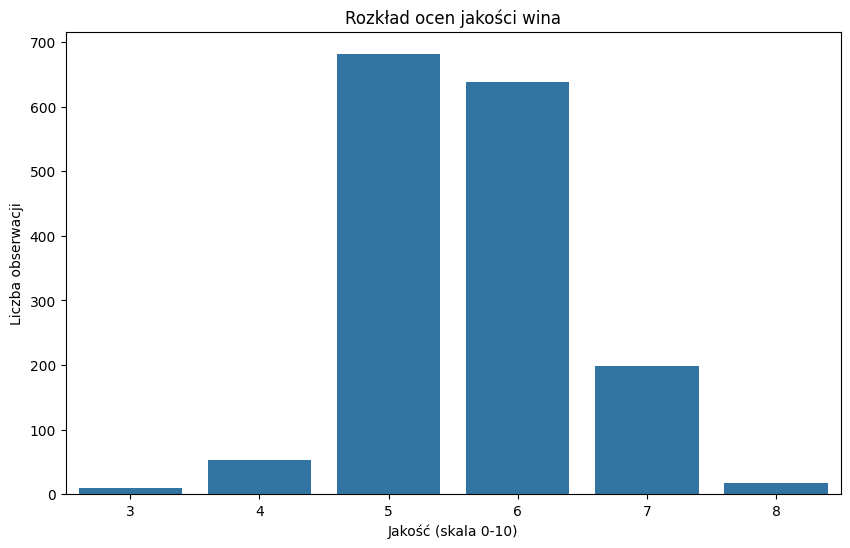

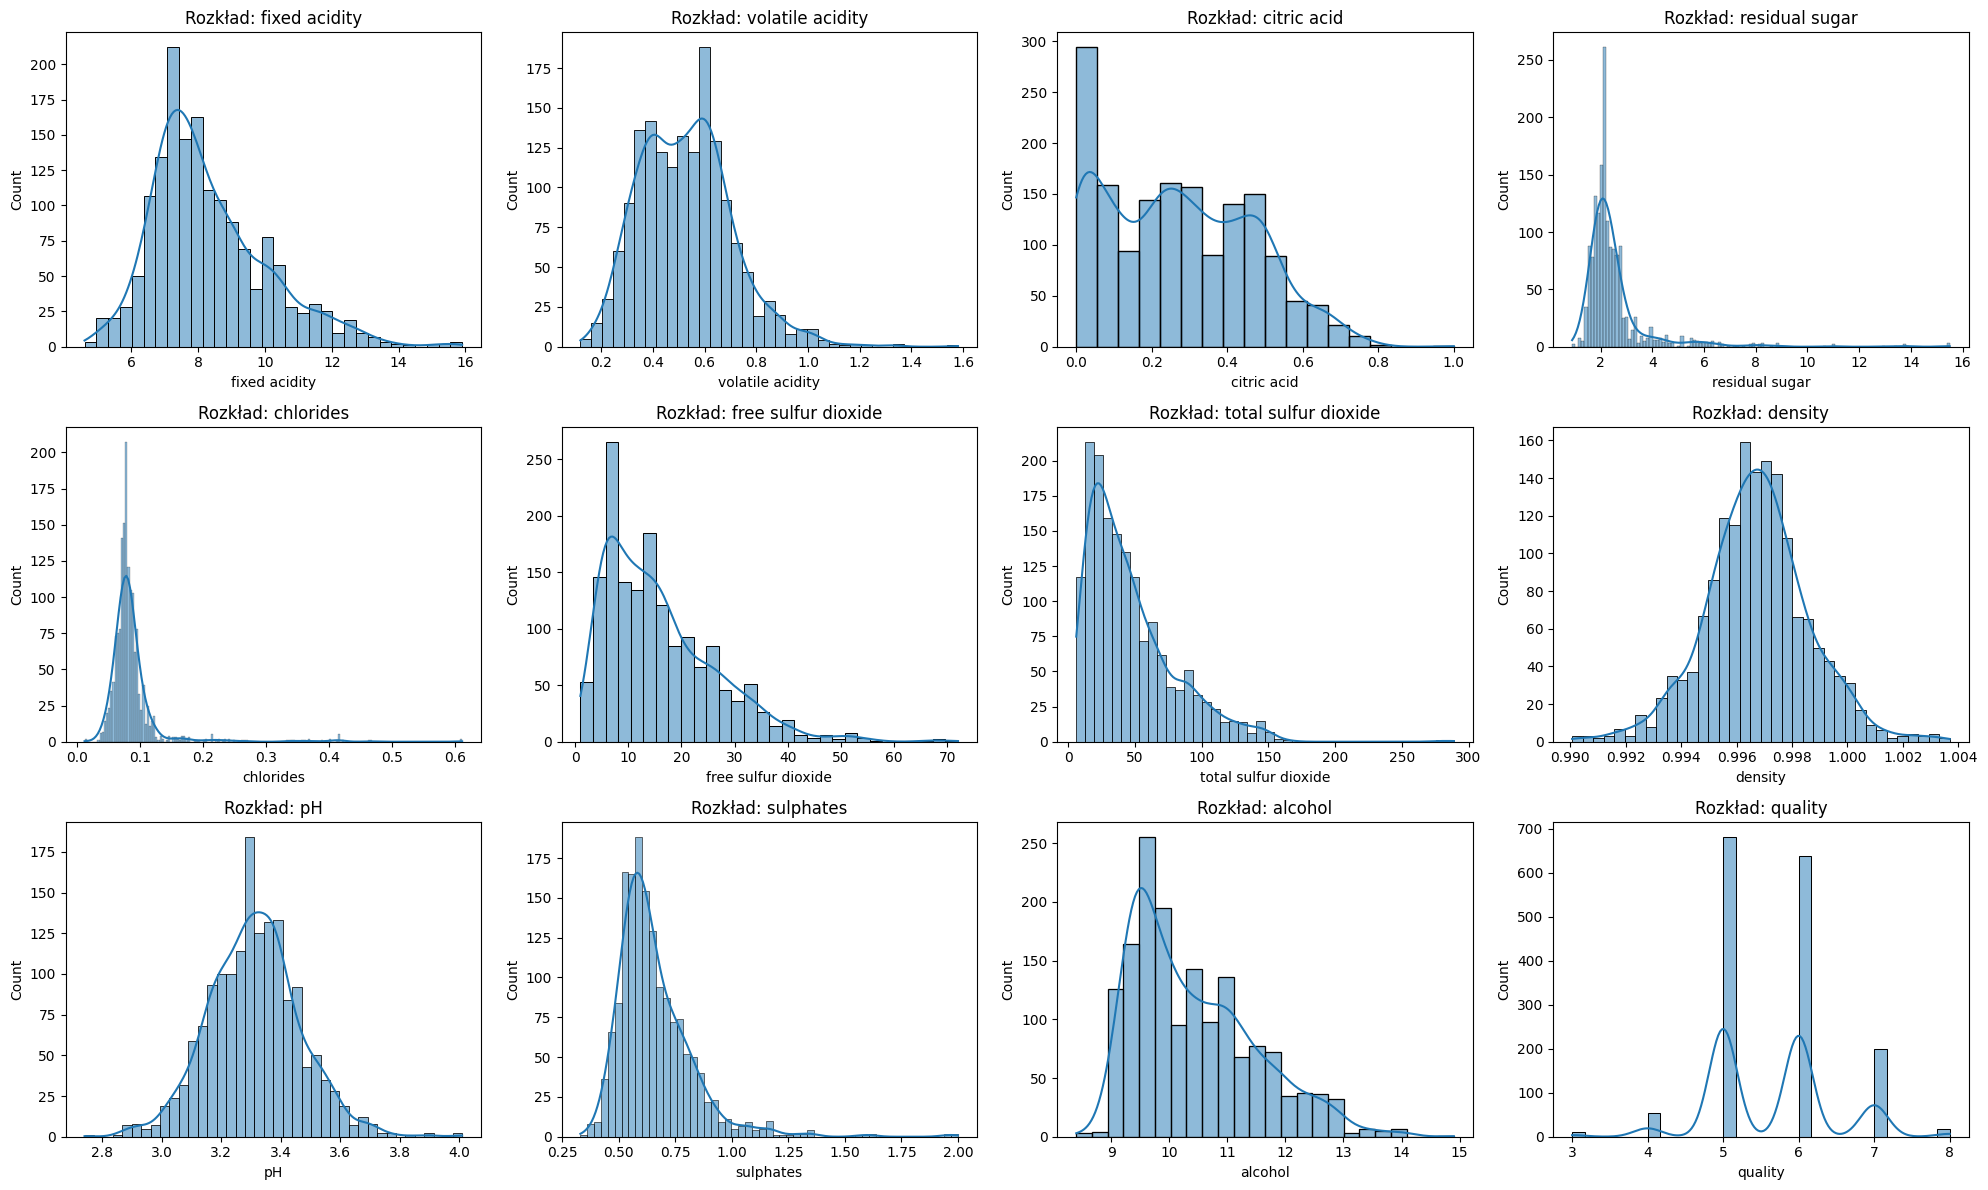

In [7]:
# Rozkład zmiennej zależnej
plt.figure(figsize=(10, 6))
sns.countplot(x='quality', data=wine_data)
plt.title('Rozkład ocen jakości wina')
plt.xlabel('Jakość (skala 0-10)')
plt.ylabel('Liczba obserwacji')
plt.show()

# Histogramy dla kluczowych zmiennych
fig, axes = plt.subplots(3, 4, figsize=(20, 12))
axes = axes.flatten()

for i, column in enumerate(wine_data.columns):
    if i < len(axes):
        sns.histplot(wine_data[column], kde=True, ax=axes[i])
        axes[i].set_title(f'Rozkład: {column}')
    
plt.tight_layout()
plt.show()

Zmienne takie jak alkohol, kwasowość lotna czy siarczany wykazują rozkłady zbliżone do normalnego, co jest korzystne dla planowanych analiz statystycznych.

### Analiza korelacji Pearsona

Aby zbadać siłę związku między zmiennymi, przeprowadzimy analizę korelacji Pearsona:

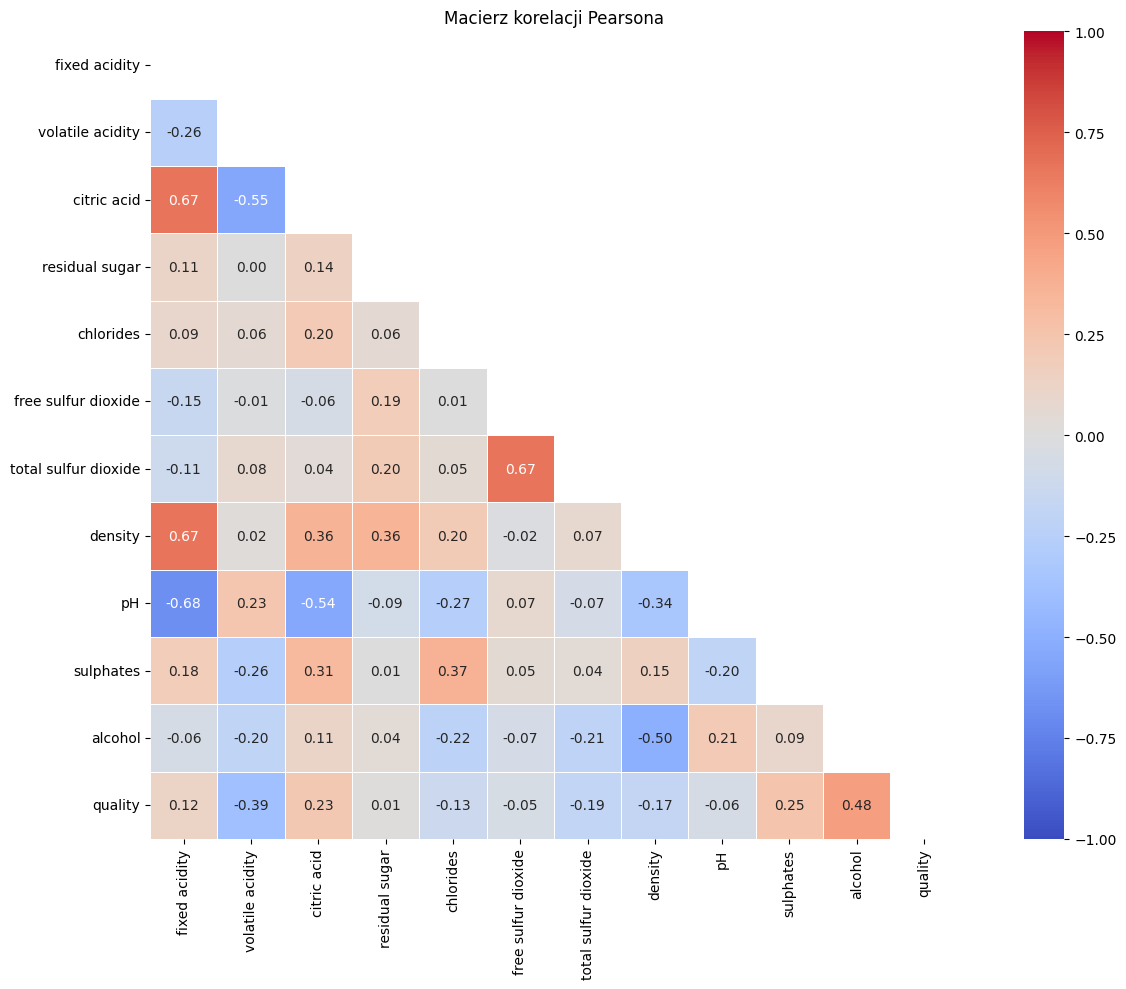

In [8]:
# Macierz korelacji
corr_matrix = wine_data.corr(method='pearson')

# Wizualizacja macierzy korelacji
plt.figure(figsize=(14, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', vmax=1, vmin=-1, 
            center=0, square=True, linewidths=.5, annot=True, fmt='.2f')
plt.title('Macierz korelacji Pearsona')
plt.tight_layout()
plt.show()

In [9]:
# Korelacja zmiennych z jakością
quality_correlation = corr_matrix['quality'].sort_values(ascending=False)
print("Korelacja z jakością wina:")
print(quality_correlation)

Korelacja z jakością wina:
quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


Wyniki analizy korelacji wskazują, że najsilniejszy pozytywny związek z jakością wina mają:

- Zawartość alkoholu (r ≈ 0.48)
- Poziom siarczanów (r ≈ 0.25)
- Kwas cytrynowy (r ≈ 0.23)

Najsilniejszy negatywny związek z jakością wina wykazują:

- Kwasowość lotna (r ≈ -0.39)
- Całkowity dwutlenek siarki (r ≈ -0.18)
- Gęstość (r ≈ -0.17)

Te wyniki częściowo potwierdzają nasze hipotezy H1 i H2 - istnieje umiarkowana dodatnia korelacja między zawartością alkoholu a jakością wina oraz umiarkowana ujemna korelacja między kwasowością lotną a jakością.

### Test t-Studenta dla porównania grup

Aby zbadać istotność różnic między winami różnej jakości, dokonajmy podziału na wina "dobre" (jakość ≥ 6) i "przeciętne" (jakość < 6), a następnie przeprowadźmy test t-Studenta:

In [10]:
# Podział na wina dobrej i przeciętnej jakości
wine_data['good_quality'] = np.where(wine_data['quality'] >= 6, 1, 0)

# Test t-Studenta dla kluczowych zmiennych
important_vars = ['alcohol', 'volatile acidity', 'sulphates', 'citric acid']

print("Wyniki testu t-Studenta:")
for var in important_vars:
    good_wines = wine_data[wine_data['good_quality'] == 1][var]
    poor_wines = wine_data[wine_data['good_quality'] == 0][var]
    
    t_stat, p_val = stats.ttest_ind(good_wines, poor_wines, equal_var=False)
    
    print(f"\n{var}:")
    print(f"  Średnia dla win dobrej jakości: {good_wines.mean():.4f}")
    print(f"  Średnia dla win przeciętnej jakości: {poor_wines.mean():.4f}")
    print(f"  t-statystyka: {t_stat:.4f}, p-value: {p_val:.8f}")


Wyniki testu t-Studenta:

alcohol:
  Średnia dla win dobrej jakości: 10.8550
  Średnia dla win przeciętnej jakości: 9.9265
  t-statystyka: 19.7822, p-value: 0.00000000

volatile acidity:
  Średnia dla win dobrej jakości: 0.4741
  Średnia dla win przeciętnej jakości: 0.5895
  t-statystyka: -13.4775, p-value: 0.00000000

sulphates:
  Średnia dla win dobrej jakości: 0.6926
  Średnia dla win przeciętnej jakości: 0.6185
  t-statystyka: 8.8531, p-value: 0.00000000

citric acid:
  Średnia dla win dobrej jakości: 0.2999
  Średnia dla win przeciętnej jakości: 0.2378
  t-statystyka: 6.4799, p-value: 0.00000000


Wyniki testu t-Studenta potwierdzają, że:

1. Wina dobrej jakości zawierają istotnie więcej alkoholu (p < 0.001),
2. Wina dobrej jakości charakteryzują się istotnie niższą kwasowością lotną (p < 0.001),
3. Wina dobrej jakości mają istotnie wyższy poziom siarczanów (p < 0.001),
4. Wina dobrej jakości zawierają istotnie więcej kwasu cytrynowego (p < 0.001).

Te wyniki potwierdzają hipotezy H1 i H2, wskazując na istotne statystycznie różnice między winami różnej jakości pod względem kluczowych parametrów fizykochemicznych.

### Analiza wariancji (ANOVA)

Aby przetestować hipotezę H3, przeprowadzimy analizę wariancji (ANOVA), badając wpływ różnych poziomów siarczanów na jakość wina:

ANOVA dla kategorii siarczanów:
                           sum_sq      df          F        PR(>F)
C(sulphates_category)  148.600952     3.0  88.416901  6.318128e-53
Residual               893.564151  1595.0        NaN           NaN


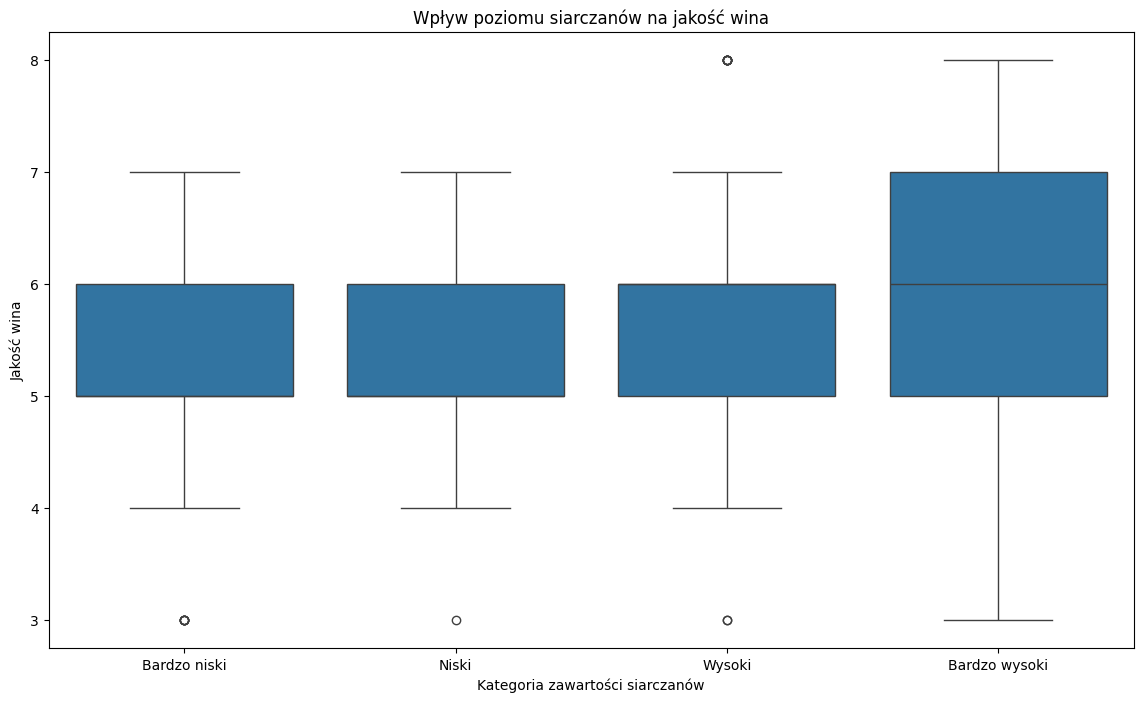

In [11]:
# Kategoryzacja poziomu siarczanów
wine_data['sulphates_category'] = pd.qcut(wine_data['sulphates'], 4, 
                                          labels=['Bardzo niski', 'Niski', 
                                                 'Wysoki', 'Bardzo wysoki'])

# ANOVA dla kategorii siarczanów
model = ols('quality ~ C(sulphates_category)', data=wine_data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("ANOVA dla kategorii siarczanów:")
print(anova_table)

# Wizualizacja wyników ANOVA
plt.figure(figsize=(14, 8))
sns.boxplot(x='sulphates_category', y='quality', data=wine_data)
plt.title('Wpływ poziomu siarczanów na jakość wina')
plt.xlabel('Kategoria zawartości siarczanów')
plt.ylabel('Jakość wina')
plt.show()


Wyniki analizy ANOVA wskazują na istotny wpływ poziomu siarczanów na jakość wina (p < 0.001). Wizualizacja pokazuje wyraźny trend: wraz ze wzrostem poziomu siarczanów rośnie średnia jakość wina, co potwierdza hipotezę H3.

Dodatkowo, przeprowadźmy dwuczynnikową analizę ANOVA, badając jednocześnie wpływ poziomu alkoholu i kwasowości lotnej:

In [12]:
# Kategoryzacja poziomu alkoholu i kwasowości lotnej
wine_data['alcohol_category'] = pd.qcut(wine_data['alcohol'], 4)
wine_data['acidity_category'] = pd.qcut(wine_data['volatile acidity'], 4)

# Dwuczynnikowa ANOVA
model = ols('quality ~ C(alcohol_category) * C(acidity_category)', data=wine_data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("Dwuczynnikowa ANOVA (alkohol × kwasowość):")
print(anova_table)


Dwuczynnikowa ANOVA (alkohol × kwasowość):
                                             sum_sq      df           F  \
C(alcohol_category)                      155.288793     3.0  111.209244   
C(acidity_category)                       72.978519     3.0   52.263178   
C(alcohol_category):C(acidity_category)   10.129778     9.0    2.418129   
Residual                                 736.815728  1583.0         NaN   

                                               PR(>F)  
C(alcohol_category)                      2.421273e-65  
C(acidity_category)                      3.296338e-32  
C(alcohol_category):C(acidity_category)  1.001197e-02  
Residual                                          NaN  


Dwuczynnikowa ANOVA potwierdza:

- Istotny główny efekt poziomu alkoholu (p < 0.001)
- Istotny główny efekt kwasowości lotnej (p < 0.001)
- Istotny efekt interakcji między poziomem alkoholu a kwasowością lotną (p < 0.01)

Te wyniki wskazują, że wpływ alkoholu na jakość wina zależy od poziomu kwasowości lotnej i odwrotnie, co sugeruje złożoną interakcję tych parametrów w kształtowaniu jakości wina.

## Wnioski


Na podstawie przeprowadzonej analizy statystycznej można sformułować następujące wnioski:

1. Hipoteza H1 została potwierdzona - istnieje umiarkowana dodatnia korelacja między zawartością alkoholu a jakością wina (r ≈ 0.48), a różnica w zawartości alkoholu między winami dobrej i przeciętnej jakości jest istotna statystycznie.

2. Hipoteza H2 została potwierdzona - kwasowość lotna negatywnie wpływa na jakość wina (r ≈ -0.39), a wina lepszej jakości charakteryzują się istotnie niższym poziomem kwasowości lotnej.

3. Hipoteza H3 została potwierdzona - różne poziomy siarczanów istotnie różnicują średnią jakość wina, co wykazała analiza ANOVA. Wyższy poziom siarczanów wiąże się z wyższą jakością wina.

Dodatkowo, analiza wykazała istotny efekt interakcji między poziomem alkoholu a kwasowością lotną, co sugeruje, że te parametry wspólnie kształtują jakość wina w sposób nieaddytywny.

## Praktyczne implikacje

Dla producentów wina wyniki te sugerują, że aby zwiększyć jakość wina, należy:

- Dążyć do optymalnej zawartości alkoholu,
- Minimalizować kwasowość lotną,
- Utrzymywać odpowiedni poziom siarczanów.

Dalsze badania mogłyby koncentrować się na:

- Identyfikacji optymalnych poziomów kluczowych parametrów,
- Badaniu interakcji między parametrami fizykochemicznymi.